<a href="https://colab.research.google.com/github/wanfadly97/fyp/blob/main/ingre_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'C:\\Users\\user\\Desktop\\KEJA PALI\\fyp\\fyp\\data'

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import re
import string

# Load the data
df = pd.read_csv('C:\\Users\\user\\Desktop\\KEJA PALI\\fyp\\fyp\\data\\ingre_nutri.csv')

# Display a sample of five rows
display(df.sample(5))

# Counts of product types
df.ingredients.value_counts()

,id,fdc_id,food,ingredients,nutrient_id,amount,nutrient
28430,318292,452253,LIGHT ICE CREAM,"SKIM MILK, MILK PROTEIN ISOLATE, ERYTHRITOL (N...",1087,286.0,Calcium
2923,33457,389739,"ELENI'S KITCHEN, ETHIOPIAN SIMMER SAUCE","ONIONS, ORGANIC TOMATO PUREE, OLIVE OIL, RED C...",1087,0.0,Calcium
18753,212843,428075,FLAVORED ORGANIC ITALIAN SODA,"CARBONATED WATER, ORGANIC SUGAR, ORGANIC APPLE...",1004,0.0,FAT
6577,74901,398397,BASIL SEED WITH PASSION FRUIT JUICE,"WATER, SUGAR, PASSION FRUIT JUICE(2%) BASIL SE...",1087,6.0,Calcium
6079,69222,397525,SAUCE,"WATER, DEHYDRATED COCONUT MILK (COCONUT MILK, ...",1087,33.0,Calcium


WHOLE WHEAT FLOUR, WATER, ENRICHED WHEAT FLOUR [FLOUR, MALTED BARLEY FLOUR, REDUCED IRON, NIACIN, THIAMIN MONONITRATE (VITAMIN B1), RIBOFLAVIN (VITAMIN B2), FOLIC ACID], CELLULOSE FIBER, YEAST, WHOLE GRAINS (WHEAT, RYE, GROUND CORN, OATS, TRITICALE, BROWN RICE, BARLEY FLAKES, MILLET), WHEAT GLUTEN, SUGAR, SALT, FLAXSEED, CULTURED WHEAT STARCH, GRAIN VINEGAR, SOYBEAN AND/OR CANOLA OIL, SOY LECITHIN, CITRIC ACID, CELLULOSE GUM, XANTHAN GUM, REB A (STEVIA LEAF SWEETENER), CULTURED DEXTROSE AND MALTODEXTRIN (A NATURAL PRESERVATIVE), SUNFLOWER LECITHIN, WHEAT STARCH.    1
OKRA, WATER, SALT                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
df=df[0:100]

In [ ]:
# embedding each ingredients
ingredient_idx = {}
corpus = []
idx = 0
ingredients = df['ingredients'].astype(str)
for i in range(len(df)):
        ingreds = ingredients[i]
        #convert ingredient column into lowercase
        ingreds = ingreds.lower()
        #split sentences by symbols
        tokens=re.split(' | |; |, |\*|\n',ingreds)
        table = str.maketrans('', '', string.punctuation)
        tokens = [w.translate(table) for w in tokens]

         #filter out numbers in words
        tokens = [word for word in tokens if word.isalpha()]
        # filter out stop words
        from nltk.corpus import stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [w for w in tokens if not w in stop_words]

        # filter out common words
        common_words = {"enriched", "following", "ingredients", "meal", "natural","wax","lake", "concentrated" }
        tokens = [w for w in tokens if not w in common_words]
        corpus.append(tokens)
        for ingredient in tokens:
            if ingredient not in ingredient_idx:
                ingredient_idx[ingredient] = idx
                idx += 1
                
              

    


In [ ]:
# Get the number of items and tokens
M = len(df)                 # The number of the items
N = len(ingredient_idx)     # The number of the ingredients
print(corpus)
# Initialize a matrix of zeros
A = np.zeros(shape = (M, N))
A.shape()

[['organic', 'broccoli'], ['beef', 'soy', 'sauce', 'water', 'salt', 'hydrolyzed', 'soy', 'protein', 'corn', 'syrup', 'caramel', 'color', 'potassium', 'sorbate', 'seasoning', 'garlic', 'pepper', 'red', 'pepper'], ['turkey', 'mechanically', 'separated', 'turkey', 'contains', 'less', 'salt', 'corn', 'syrup', 'solids', 'spices', 'dextrose', 'lactic', 'acid', 'starter', 'culture', 'carrageenan', 'sodium', 'erythorbate', 'made', 'sugar', 'garlic', 'powder', 'sodium', 'nitrite', 'collagen', 'casing'], ['green', 'lima', 'beans', 'water', 'monosodium', 'glutamate', 'salt', 'dehydrated', 'onion', 'sugar', 'spices', 'rendered', 'bacon', 'fat', 'calcium', 'chloride', 'firming', 'agent', 'hickory', 'smoke', 'flavor'], ['sugar', 'nonfat', 'dry', 'milk', 'whey', 'dutchprocessed', 'cocoa', 'coconut', 'oil', 'corn', 'syrup', 'solids', 'partially', 'hydrogenated', 'soybean', 'oil', 'salt', 'potassium', 'sodium', 'phosphate', 'cellulose', 'gum', 'mono', 'diglycerides', 'sodium', 'caseinate', 'artificial'

TypeError: 'tuple' object is not callable

In [ ]:
corpus

In [ ]:
# Define the oh_encoder function
def oh_encoder(tokens):
    x = np.zeros(N)
    for t in tokens:
            # Get the index for each ingredient
            idx = ingredient_idx[t]
            # Put 1 at the corresponding indices
            x[idx] = 1
    return x

In [ ]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = oh_encoder(tokens)
    i += 1

In [ ]:
# Dimension reduction with t-SNE
model = TSNE(n_components = 2, learning_rate = 20)
tsne_features = model.fit_transform(A)

# Make X, Y columns
df['X'] = tsne_features[:, 0]
df['Y'] = tsne_features[:, 1]


In [ ]:
# Import TSNE
from sklearn.manifold import TSNE
#Import Matplotlib
import matplotlib.pyplot as plt
#Import Bokeh
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
# Import KMeans
from sklearn.cluster import KMeans
output_notebook()

Loading BokehJS ...

In [ ]:
# Make a source and a scatter plot
source = ColumnDataSource(df)
plot = figure(x_axis_label = 'T-SNE 1',
              y_axis_label = 'T-SNE 2', 
              width = 500, height = 400)
plot.circle(x = 'X', 
            y = 'Y', 
            source = source, 
            size = 10, color = '#FF7373', alpha = .8)

GlyphRenderer(id='1037', ...)

In [ ]:
# Create a KMeans instance with number of clusters: model
model = KMeans()

# Fit model to points
model.fit(A)

# Determine the cluster labels of new_points: labels
labels = model.predict(A)

# Print cluster labels of new_points
print(labels)

[0 0 6 0 7 7 6 0 6 0 6 0 0 0 0 6 6 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 0 0
 6 6 0 0 7 7 0 4 4 4 4 6 2 0 0 0 7 0 6 0 0 0 7 7 0 0 6 0 0 0 6 0 6 6 6 0 0
 0 6 0 0 6 6 6 6 6 6 0 6 0 6 5 0 0 3 0 6 1 6 6 1 0 0]


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=2)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


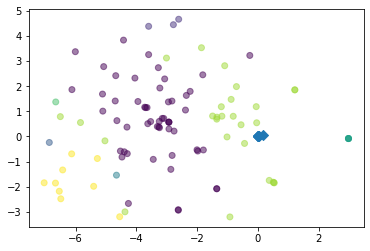

In [ ]:
# Assign the columns of new_points: xs and ys
xs = tsne_features[:,0]
ys = tsne_features[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

In [ ]:
plot.background_fill_color = "beige"
plot.background_fill_alpha = 0.2

# add hover tool
hover = HoverTool(tooltips = [
        ('food', '@food'),
        ('nutrition', '@nutrient')])
plot.add_tools(hover)

In [ ]:
# Plot the map
show(plot)

In [ ]:
# Fit the pipeline to samples
pipeline.fit(A)

# Calculate the cluster labels: labels
labels = pipeline.predict(A)

# Create a DataFrame with labels and species as columns: df
df1 = pd.DataFrame({'Item':xs,'Ingredients':ys})

# Create crosstab: ct
ct = pd.crosstab(df1['Item'],df1['Ingredients'])

# Display ct
print(ct)

Ingredients  -3.206084  -3.199084  -3.003542  -2.939594  -2.918820  -2.669957  \
Item                                                                            
-7.036707            0          0          0          0          0          0   
-6.867431            0          0          0          0          0          0   
-6.664611            0          0          0          0          0          0   
-6.655699            0          0          0          0          0          0   
-6.538880            0          0          0          0          0          0   
...                ...        ...        ...        ...        ...        ...   
 1.220327            0          0          0          0          0          0   
 2.984963            0          0          0          0          0          0   
 2.985504            0          0          0          0          0          0   
 2.985600            0          0          0          0          0          0   
 2.987490            0      

In [ ]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(A)

# Select the 0th feature: xs
xs = tsne_features[:, 0]
# Select the 1th feature: ys
ys = tsne_features[:, 1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5);

# Annotate the points
for x, y, corpus in zip(xs, ys, corpus):
    plt.annotate(corpus, (x, y), fontsize=5, alpha=0.75)
plt.show()
